# Exploración de una variable categórica

Una de los primeros pasos en el análiss de variables categóricas es la contabilización de la frecuencia. Esto nos permitiría conocer nuestros datos en base a proporciones, que tanta proporción le corresponde a cada categoría.

Volviendo a nuestro dataset procesado del notebook de introducción:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins  # dataset de pinguinos
import pandas as pd
import scipy.stats
import seaborn as sns

In [3]:
# estos fueron los cambios realizados en el notebook anterior
preprocess_penguins_df = palmerpenguins.load_penguins()
process_penguins_df = preprocess_penguins_df.dropna()

In [5]:
# Obtenemos una descripcion general del dataset
process_penguins_df.describe(include = 'all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


Podemos visualizar solo las variables numericas

In [10]:
process_penguins_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


Podemos visualizar solo las variables categóricas:

In [12]:
#visualizamos cuantos valores unicos hay, el de mayor frecuencia y su frecuencia
process_penguins_df.describe(include = 'object')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


Podemos definir una categorpia con astype() que incluya ciertas variables y mandarlas a llamar con el comando describe(), ideal para visualizar solo ciertas variables categóricas o numéricas.

In [15]:
process_penguins_df.astype(
        {'species':'category',
        'island': 'category',
        'sex': 'category'}
        ).describe(include = 'category')


,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### ¿Como visualizar los conteos?

Pandas

<AxesSubplot: >

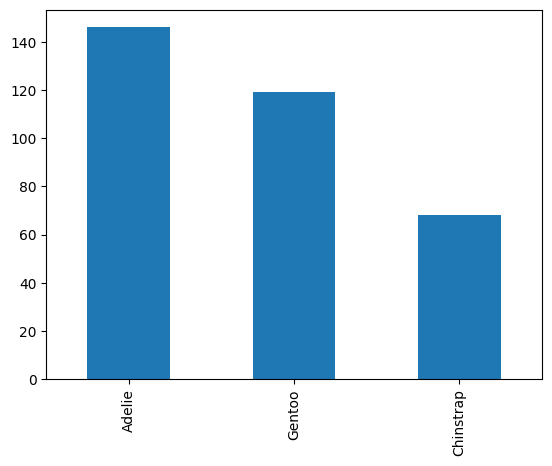

In [19]:
process_penguins_df['species'].value_counts().plot(kind = 'bar')

Seaborn

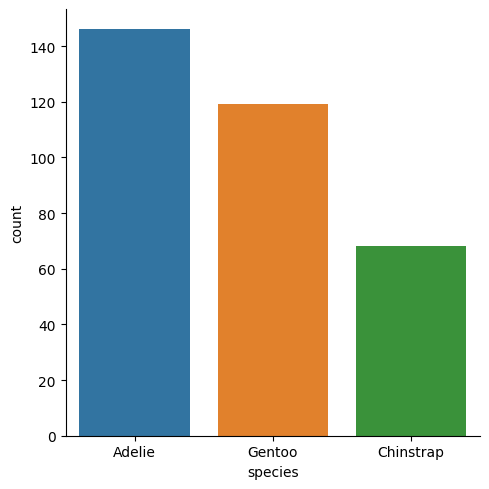

In [21]:
sns.catplot(data = process_penguins_df, x = 'species', kind = 'count')

### ¿Cómo visualizar las proporciones?

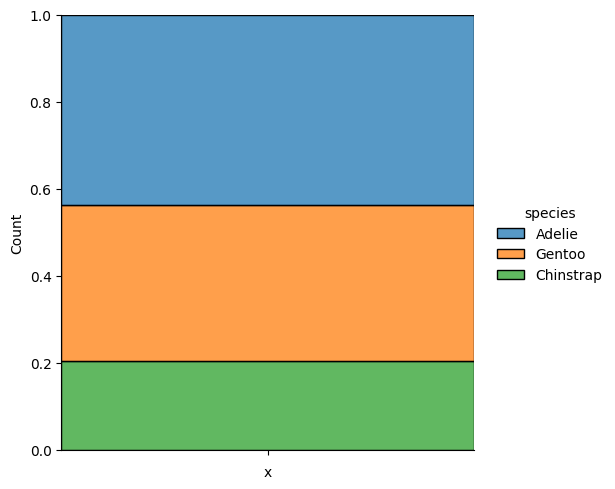

In [29]:
process_penguins_df.assign(x= '').pipe(
    lambda df: (
    sns.displot(data = df, x='x', hue='species', multiple = 'fill')
    )
)

# Exploración de una variable numérica

### Medidas de tendencia central
Las medidas de tendencia central vistas anteriormente sirven para describir los datos

In [32]:
process_penguins_df['bill_depth_mm'].mean()

17.164864864864867

In [33]:
# media
process_penguins_df.mean()

/tmp/ipykernel_404/941056637.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins_df.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

In [35]:
# mediana
process_penguins_df.median()

/tmp/ipykernel_404/2094490520.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  process_penguins_df.median()


bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
year                 2008.0
dtype: float64

In [36]:
# moda
process_penguins_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


### Medidas de dispersión

In [37]:
# Rango
process_penguins_df.max(numeric_only=True) - process_penguins_df.min(numeric_only=True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

In [44]:
# Rango intercuantil
Q1 = process_penguins_df.quantile(0.25, numeric_only=True)
Q3 = process_penguins_df.quantile(0.75, numeric_only=True)

IRQ = Q3 - Q1
IRQ


bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [45]:
# Desviacion estandar
process_penguins_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [48]:
#compactando toda la informacion en una tabla
(process_penguins_df.quantile(q = [0.25, 0.5, 0.75], numeric_only=True)
                                .transpose()
                                .rename_axis('variable')
                                .reset_index()
                                .assign(iqr=lambda df: df[0.75]- df[0.25])
)

,variable,0.25,0.5,0.75,iqr
0,bill_length_mm,39.5,44.5,48.6,9.1
1,bill_depth_mm,15.6,17.3,18.7,3.1
2,flipper_length_mm,190.0,197.0,213.0,23.0
3,body_mass_g,3550.0,4050.0,4775.0,1225.0
4,year,2007.0,2008.0,2009.0,2.0


Si visualizamos las variables en un histograma podemos visualizarlo mejor

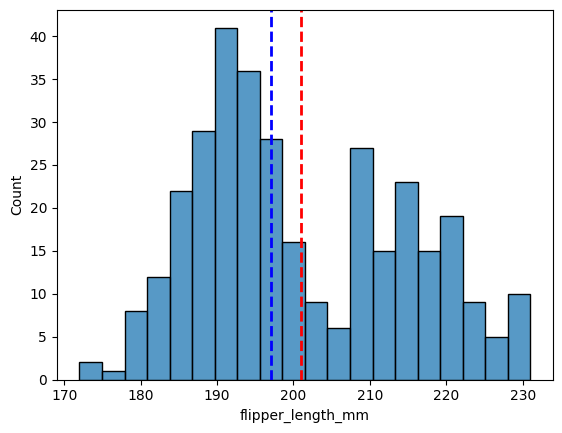

In [57]:
sns.histplot(data = process_penguins_df, x = 'flipper_length_mm', bins = 20)
plt.axvline(x =process_penguins_df['flipper_length_mm'].mean(),
            color = 'red',
            linestyle = 'dashed',
            linewidth = 2)  #linea vertical que corta el grafico

plt.axvline(x =process_penguins_df['flipper_length_mm'].median(),
            color = 'blue',
            linestyle = 'dashed',
            linewidth = 2)  
plt.show()

Podemos obtener la misma información en una gráfica de caja, salvo la forma de la distribución.

<AxesSubplot: xlabel='flipper_length_mm'>

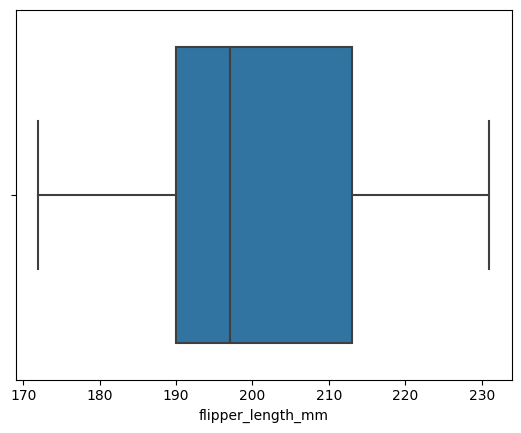

In [55]:
sns.boxplot(data = process_penguins_df, x = 'flipper_length_mm')

### Funciones de distribucion
Como vimos en anteriores cursos, estas describen la probabilidad de ocurrencia de un valor sobre el eje x. Ejemplo, la probabilidad de que en un salon hayan personas con una edad especifica. Para visualizarlo hacemos lo siguiente:

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

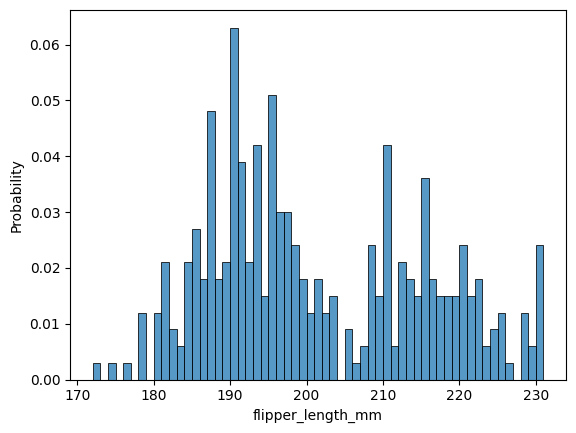

In [59]:
sns.histplot(data = process_penguins_df,
              x = 'flipper_length_mm',
              binwidth= 1,   #para obtener una barra por cada posible valor
              stat = 'probability') #para que el eje y lo represente en probabilidad


Se puede obtener las distribuciones con la paquetería empiricaldist

In [60]:
import empiricaldist

In [61]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    process_penguins_df['flipper_length_mm']
)

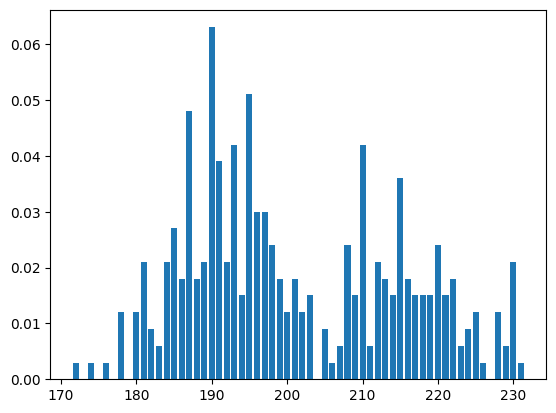

In [63]:
pmf_flipper_length_mm.bar()

La ventaja con esta paquetería es que podemos consultar las probabilidades especificas de cada valor

In [64]:
# ¿Cual es la porbabilidad de que la longitud del ala sea de 190 mm?
pmf_flipper_length_mm(190)

0.06306306306306306

### Funciones de distribución acumulativa
Devuelve la probabilidad de que una variable sea igual o menor que un valor determinado. Ejemplo, la probabilidad de que en un salon hayan personas menores o iguales a una edad especifica.

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

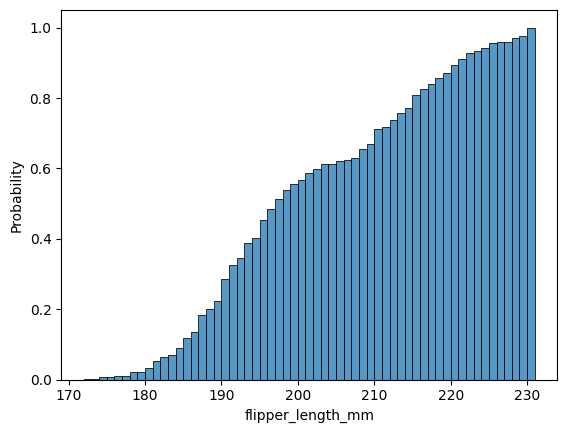

In [67]:
sns.histplot(data = process_penguins_df,
              x = 'flipper_length_mm',
              binwidth= 1,
              cumulative = True,
              stat = 'probability')
              

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

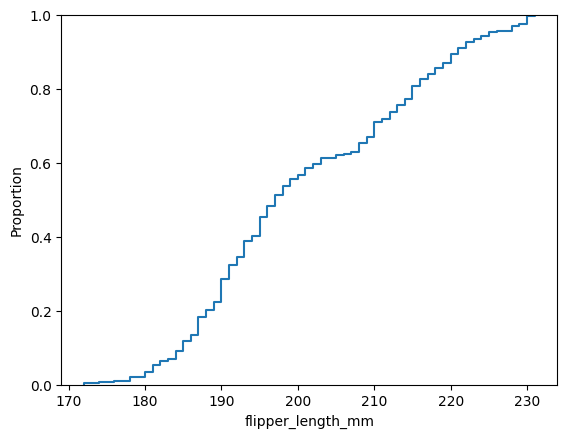

In [68]:
# otra forma de verlo es con ecdfplot
sns.ecdfplot(data = process_penguins_df,
              x = 'flipper_length_mm' )

Se puede replicar esta gráfica con un la paquetería empiricaldist y de la misma forma, podemos obtener valores especificos de la probabilidad acumulada

<AxesSubplot: >

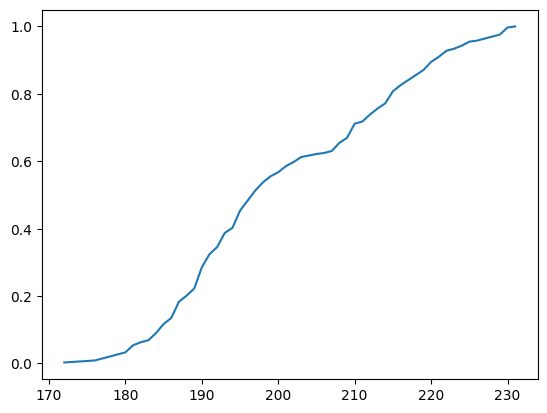

In [73]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    process_penguins_df['flipper_length_mm']
)

cdf_flipper_length_mm.plot()

In [74]:
# para encontrar la probabilidad de que el ala de un pinguino sea menor a 200
cdf_flipper_length_mm.forward(200)

array(0.56756757)

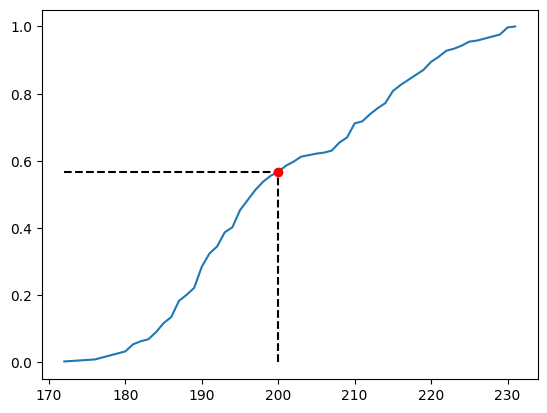

In [76]:
# añadimos lineas guia en los puntos que nos interesa 
# saber su probabilidad acumulada
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm.forward(q)


plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

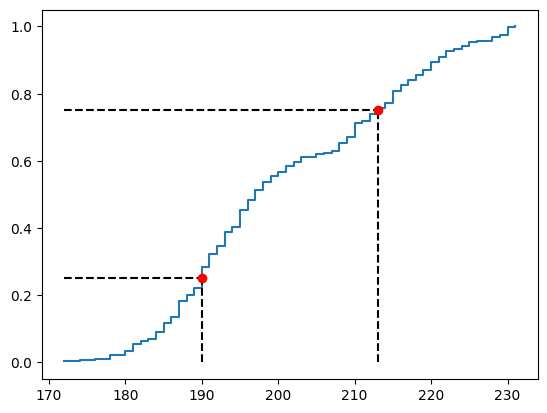

In [77]:
# visualizamos el rango intercuantil en la grafica de probabilidad
# acumulada

cdf_flipper_length_mm.step ( )
p_1 = 8.25 # Specify probability
P_2 = 8.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

Comparando las distribuciones de las longitudes de las alas de las 3 especies de pinguinos:

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

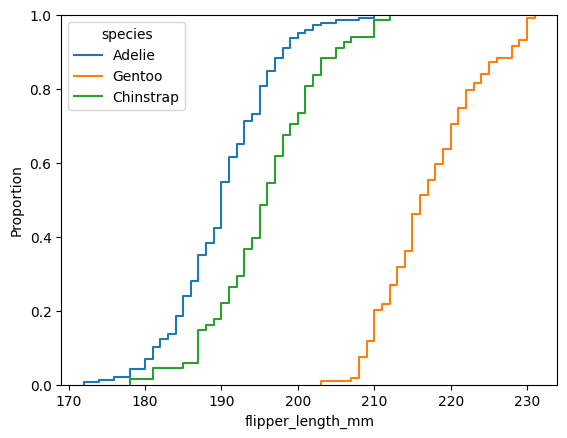

In [79]:
sns.ecdfplot(data = process_penguins_df,
             x = 'flipper_length_mm',
             hue = 'species')

La especie "Gentoo" tienen aletas mucho mas grandes que el resto de las aves.

Volviendo a las funciones de distribución (densidad):

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

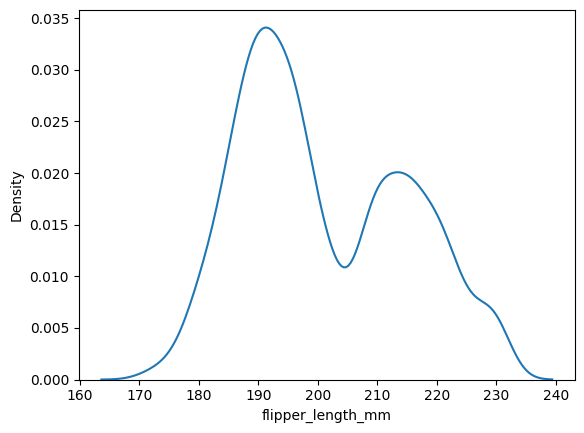

In [84]:
sns.kdeplot(data = process_penguins_df,
             x = 'flipper_length_mm',
             bw_method=0.2)

In [86]:
stats = process_penguins_df['body_mass_g'].describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

Comparamos las distribuciones reales con las teóricas

<AxesSubplot: >

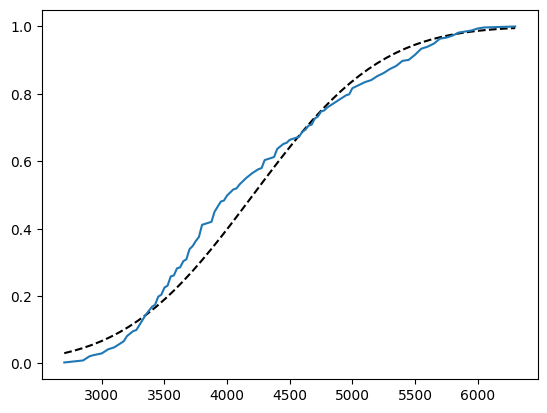

In [90]:
xs = np.linspace(stats['min'], stats['max'] )
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)


# distribución acumulativa teorica, cuyos parametros fueron obtenidos de 
# los datos body_mass_g
plt.plot(xs,ys, color = 'black', linestyle = 'dashed') 


# funcion de distribucion acumulativa real 
empiricaldist.Cdf.from_seq(
    process_penguins_df['body_mass_g']
).plot()

<AxesSubplot: xlabel='body_mass_g', ylabel='Density'>

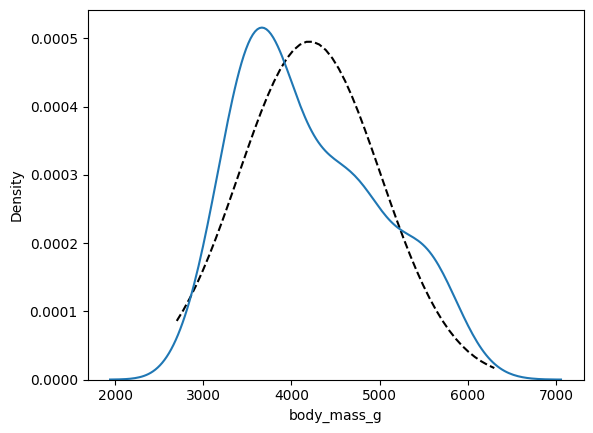

In [92]:
xs = np.linspace(stats['min'], stats['max'] )
ys = scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)


# distribución de probabilidad teorica, cuyos parametros fueron obtenidos de 
# los datos body_mass_g
plt.plot(xs,ys, color = 'black', linestyle = 'dashed') 


# funcion de distribucion de probabilidad real 
sns.kdeplot(data = process_penguins_df,
            x = 'body_mass_g')

Con lo anterior, podemos confirmar qeu nuestros datos no se distribuyen de forma normal, por lo que habrá que realizar un tratamiento previo para poder emplearlo en modelos.

### Ley de los grandes números

"La probabilidad experimental tiende a la probabilidad teórica a medida que aumenta el número de repeticiones del experimento"



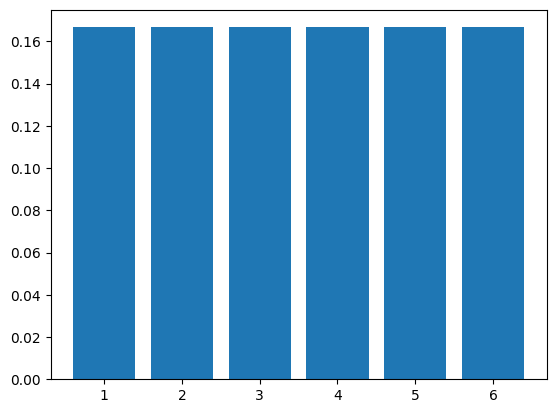

In [95]:
# Experimento de un dado
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

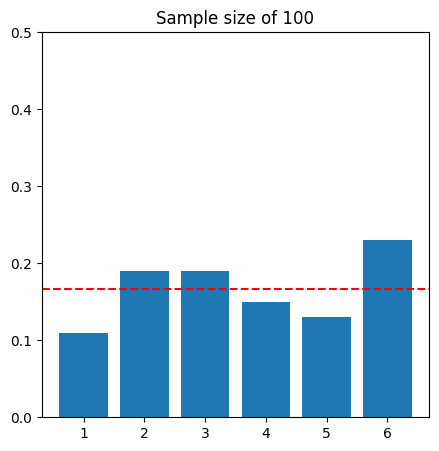

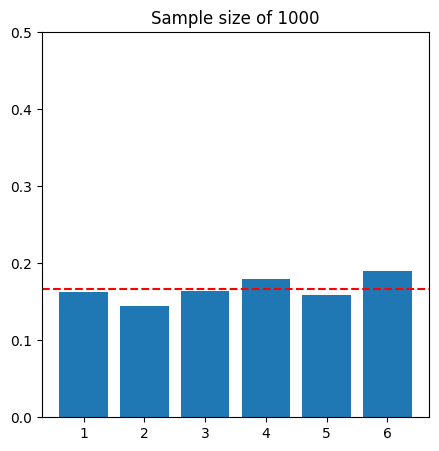

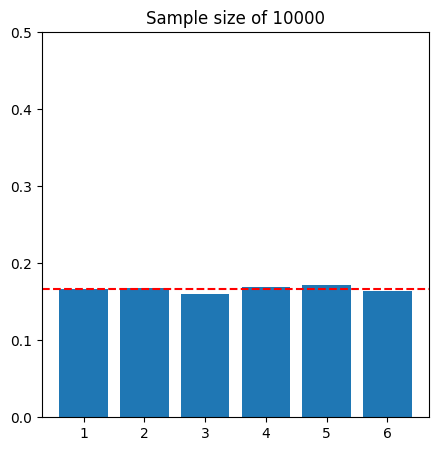

In [97]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size) #tamaño de la muestra
    values = dice.sample(sample_size) #tomamos una muestra de valores entre 1 y 6
    sample_pmf = empiricaldist.Pmf.from_seq(values)

    plt.figure(figsize=(5,5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color = 'red', linestyle = 'dashed')
    plt.ylim(0,0.5)
    plt.title(f'Sample size of {sample_size}')

A medida de que aumenta el número de experimentos, la proporción de cada cara en un dado se acerca a 1/6.

### Teorema del límite central

"La media de las muestras tienden a una distribucion normal" o bien de forma más precisa "La suma de n variables aleatorias independientes con medias y varianzas finitas convergen a una variable aleatoria con distribución normal".

In [99]:
process_penguins_df.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [100]:
sex_numeric = process_penguins_df.sex.replace(['male', 'female'], [1,0])

In [104]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample


male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

/tmp/ipykernel_404/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_404/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_404/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

Estimated percentage of male penguins in population is: 50.1829%


/tmp/ipykernel_404/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_404/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample
/tmp/ipykernel_404/2100621360.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented f

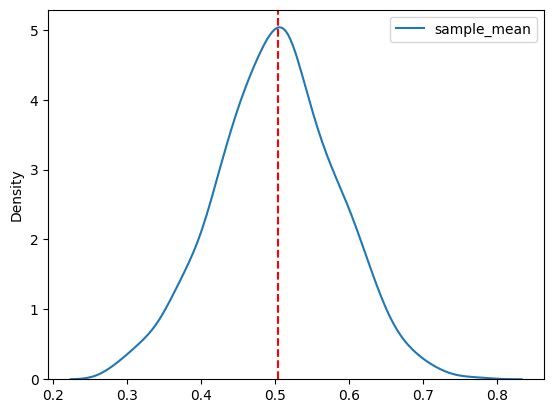

In [102]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')